Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
import logging
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
def rastrigin(x, A=10, axis=1):
    """Rastrigin test function"""
    return -np.sum(A - A * np.cos(2 * np.pi * x) + x**2, axis=axis)


def sphere(x, axis=1):
    """Sphere test function"""
    return -np.sum(x**2, axis=axis)

## Test function

In [12]:
problem = rastrigin
N_DIM = 2

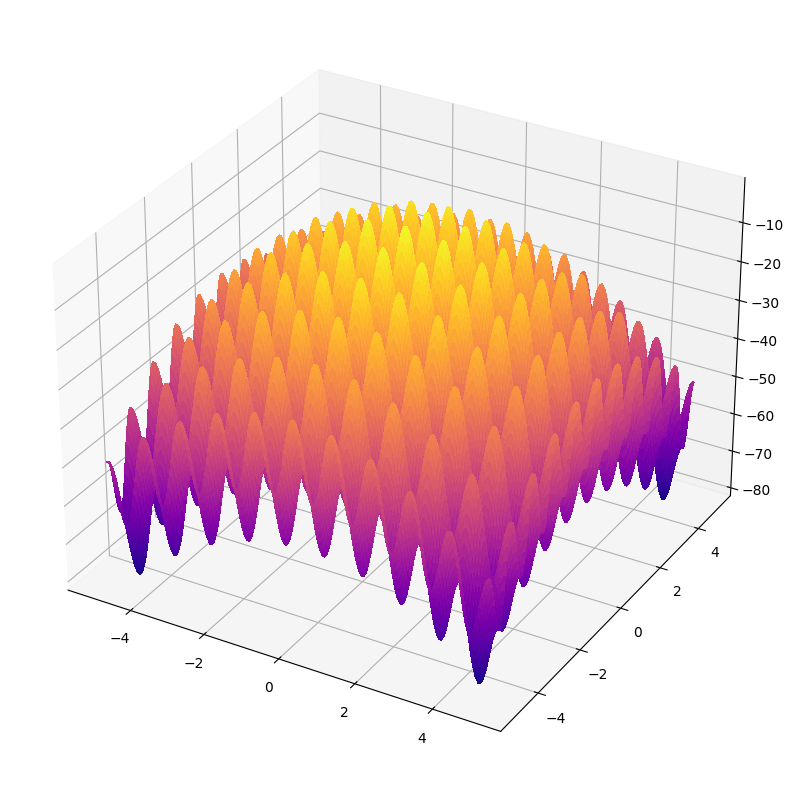

In [13]:
N_POINTS = 200
r = np.linspace(-5, 5, N_POINTS)

x = np.array(np.meshgrid(r, r))
z = problem(x, axis=0)
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.plot_surface(*np.meshgrid(r, r), z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)
None

## Vanilla (1+λ)-ES

100%|██████████| 50000/50000 [00:04<00:00, 10284.31it/s]


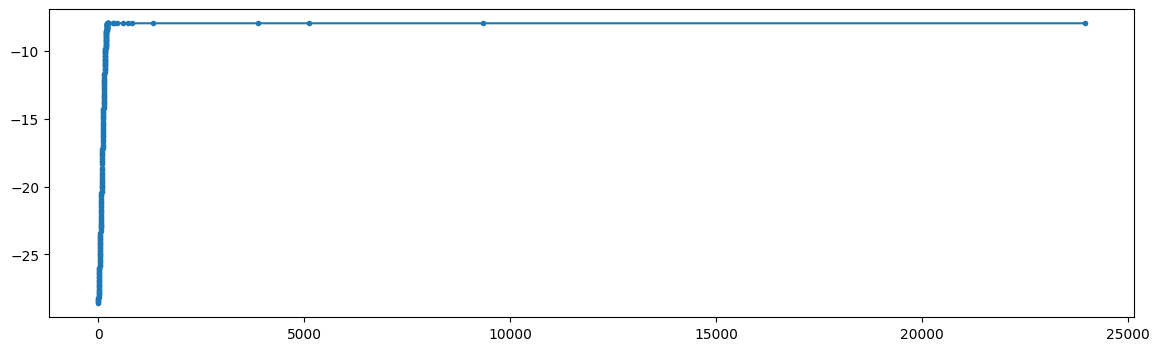

In [14]:
λ = 20
σ = 0.001

solution = np.random.random(N_DIM) * 5.12 * 2 - 5.12
history = list()
best_so_far = np.copy(solution)

for n in tqdm(range(1_000_000 // λ)):
    # offspring <- select λ random points mutating the current solution
    offspring = np.random.normal(loc=0, scale=σ, size=(λ, N_DIM)) + solution
    # evaluarte and select best
    evals = problem(offspring)
    solution = offspring[np.argmax(evals)]
    if problem(best_so_far, axis=0) < problem(solution, axis=0):
        best_so_far = np.copy(solution)
        history.append((n, problem(solution, axis=0)))

logging.info(f"Best solution: {problem(best_so_far, axis=0)}")

history = np.array(history)
plt.figure(figsize=(14, 4))
plt.plot(history[:, 0], history[:, 1], marker=".")
None